In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
birth = 10
death = 0.1

# (ii) Simulation of Gillespie algorithm

In [3]:
def simulation_history(T):

    # current time

    t = 0

    # rate of birth

    birth = 10

    # rate of death

    death = 0.1

    # initial population

    x = 0

    # history

    history = []

    #main loop

    while t < T:

        if x < 0:
            break

        a1 = birth
        a2 = death*x
        a = a1 + a2

        # delta t

        dt = np.log(1/np.random.uniform(0.0,1.0)) / a
        t = t + dt

        if np.random.uniform(0.0,1.0) < a1 / a:
            x += 1

        else:
            x -= 1

        history.append((t,x))
        
    return history

Text(0.5, 0, 'Time')

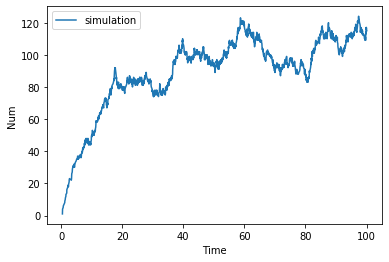

In [4]:
history = simulation_history(100)
t = []
x = []
for i in history:
    t.append(i[0])
    x.append(i[1])
    
plt.plot(t,x,label="simulation")
plt.legend()
plt.ylabel('Num')
plt.xlabel('Time')

# (iii) Calculate mean/var/skewness

In [10]:
def simulation(T):
    # This will only return final x at time T
    
    # current time

    t = 0

    # rate of birth

    birth = 10

    # rate of death

    death = 0.1

    # initial population

    x = 0

    #main loop

    while t < T:

        if x < 0:
            break

        a1 = birth
        a2 = death*x
        a = a1 + a2

        # delta t

        dt = np.log(1/np.random.uniform(0.0,1.0)) / a
        t = t + dt

        if np.random.uniform(0.0,1.0) < a1 / a:
            x += 1

        else:
            x -= 1
        
    return x

In [11]:
T = 100
data = []
for i in range(T):
    x = []
    for j in range(1000):
        # for each time sampling 100 times
        x.append(simulation(i))
    data.append(x)

Text(0.5, 0, 'Time')

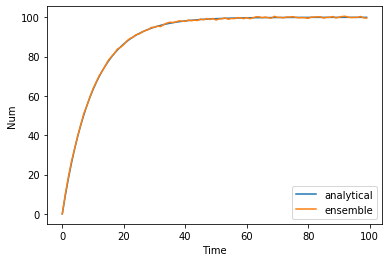

In [12]:
T = 100
analytical_time =  np.arange(T)
Lambda = birth/death*(1-np.exp(-death * analytical_time))
plt.plot(analytical_time, Lambda, label="analytical")

ensemble_average = []
for i in data:
    ensemble_average.append(np.mean(i))
plt.plot(analytical_time, ensemble_average, label="ensemble")
plt.legend()
plt.ylabel('Num')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

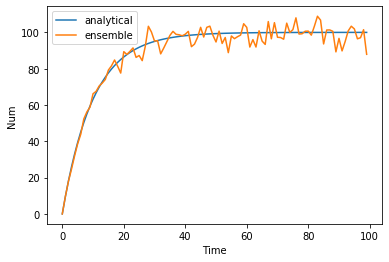

In [13]:
T =100
analytical_time =  np.arange(T)
Lambda = birth/death*(1-np.exp(-death * analytical_time))
plt.plot(analytical_time, Lambda, label="analytical")

ensemble_var = []
for i in data:
    ensemble_var.append(np.var(i))
plt.plot(analytical_time, ensemble_var,label="ensemble")
plt.legend()
plt.ylabel('Num')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

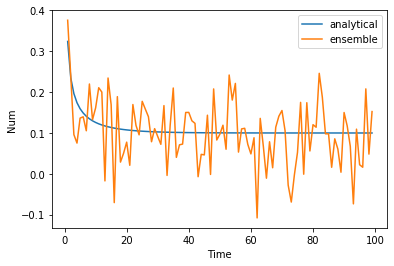

In [14]:
T = 100
analytical_time =  np.arange(1,T)
Lambda = birth/death*(1-np.exp(-death * analytical_time))
plt.plot(analytical_time, 1/np.sqrt(Lambda), label="analytical")

ensemble_skew = []
for i in np.arange(1,T):
    ensemble_skew.append(np.mean((np.array(data[i])-np.mean(data[i]))**3/np.sqrt(np.var(data[i]))**3))
    
plt.plot(analytical_time, ensemble_skew,label="ensemble")
plt.legend()
plt.ylabel('Num')
plt.xlabel('Time')

#  (iv) probability distribution

In [15]:
def analysis(t, data):
    Lambda  = birth/death*(1-np.exp(-death * t))
    x = np.arange(150)
    p = []
    for i in x:
        p.append(np.exp(-Lambda)*(Lambda)**i/np.math.factorial(i))
    p_new = [0]*150
    for i in data[t]:
        p_new[i] += 1
    return p, np.array(p_new)/1000

Text(0.5, 0, 'Num')

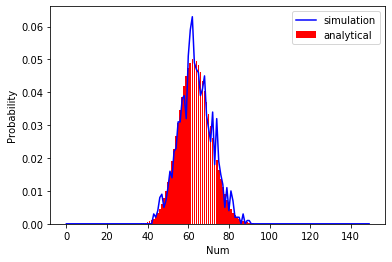

In [16]:
a, b = analysis(10,data)

plt.plot(np.arange(150), b, c='b', label="simulation")
plt.bar(np.arange(150), a, color='r',label="analytical")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Num')

Text(0.5, 0, 'Num')

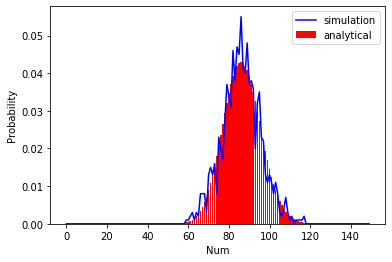

In [17]:
a, b = analysis(20,data)

plt.plot(np.arange(150), b, c='b',label="simulation")
plt.bar(np.arange(150), a, color='r',label="analytical")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Num')

Text(0.5, 0, 'Num')

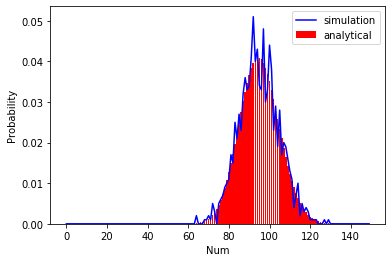

In [18]:
a, b = analysis(30,data)

plt.plot(np.arange(150), b, c='b',label="simulation")
plt.bar(np.arange(150), a, color='r',label="analytical")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Num')

Text(0.5, 0, 'Num')

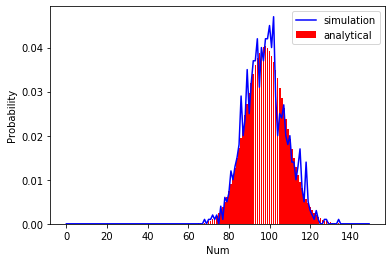

In [19]:
a, b = analysis(40,data)

plt.plot(np.arange(150), b, c='b',label="simulation")
plt.bar(np.arange(150), a, color='r',label="analytical")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Num')

Text(0.5, 0, 'Num')

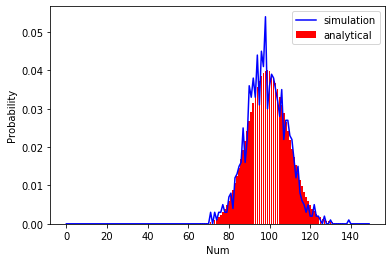

In [20]:
a, b = analysis(50,data)

plt.plot(np.arange(150), b, c='b',label="simulation")
plt.bar(np.arange(150), a, color='r',label="analytical")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Num')

# (V) correlation

In [21]:
def simulation_correlated(X, T1, T2):

    # current time

    t =T1

    # rate of birth

    birth = 10

    # rate of death

    death = 0.1

    # initial population

    x = X

    # history
    
    population = []

    #main loop

    while t < T2:

        if x < 0:
            break

        a1 = birth
        a2 = death*x
        a = a1 + a2

        # delta t

        dt = np.log(1/np.random.uniform(0.0,1.0)) / a
        t = t + dt

        if np.random.uniform(0.0,1.0) < a1 / a:
            x += 1

        else:
            x -= 1

        #time.append(t)
        #population.append(x)
        
    return x

In [22]:
t = 25
distribution = []
for i in range(1000):
    distribution.append(simulation(25))
auto_correlation_simulation = []
for tau in range(0,50):
    distribution_tau = []
    for i in range(1000):
        distribution_tau.append(simulation_correlated(distribution[i],t,t+tau))
    auto_correlation_simulation.append(np.mean((np.array(distribution) - np.mean(distribution))*(np.array(distribution_tau) - np.mean(distribution_tau))))

In [23]:
Lambda = birth/death*(1-np.exp(-death * (t)))
auto_correlation_analytical = []
for tau in range(0,50):
    auto_correlation_analytical.append(Lambda*np.exp(-death*tau))

Text(0.5, 0, 'Delta t')

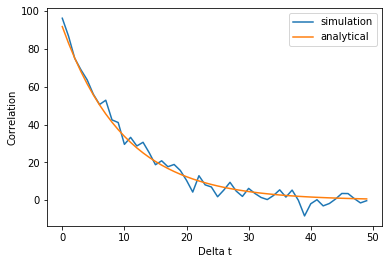

In [24]:
plt.plot(np.arange(0,50), auto_correlation_simulation, label="simulation")
plt.plot(np.arange(0,50), auto_correlation_analytical, label="analytical")
plt.legend()
plt.ylabel('Correlation')
plt.xlabel('Delta t')

# (vi) Time average & ensemble average

In [25]:
def simulation_history(T):

    # current time

    t = 0

    # rate of birth

    birth = 10

    # rate of death

    death = 0.1

    # initial population

    x = 0

    # history

    history = []

    #main loop

    while t < T:

        if x < 0:
            break

        a1 = birth
        a2 = death*x
        a = a1 + a2

        # delta t

        dt = np.log(1/np.random.uniform(0.0,1.0)) / a
        t = t + dt

        if np.random.uniform(0.0,1.0) < a1 / a:
            x += 1

        else:
            x -= 1

        history.append(x)
        
    return history

In [26]:
t1 = 1/death * 10
t2 = 1/death * 100
# time average:
history = simulation_history(t2)
time_average = np.mean(history)
    
# ensemble average
data = []
for i in range(10000):
    data.append(simulation(t1))
ensemble_average = np.mean(data)
 
print("time average is: ", time_average, " ensemble average is: ", ensemble_average)

time average is:  98.29211460573029  ensemble average is:  99.9033


# (vii) First pass

In [27]:
def first_pass(X):

    # current time

    t = 0

    # rate of birth

    birth = 10

    # rate of death

    death = 0.1

    # initial population

    x = 0

    # history

    time = []
    population = []

    #main loop

    while x < X:

        if x < 0:
            break

        a1 = birth
        a2 = death*x
        a = a1 + a2

        # delta t

        dt = np.log(1/random.uniform(0.0,1.0)) / a
        t = t + dt

        if random.uniform(0.0,1.0) < a1 / a:
            x += 1

        else:
            x -= 1

        #time.append(t)
        #population.append(x)
        
    return t

In [28]:
X = 60
time = []
for i in range(1000):
    time.append(first_pass(X))

In [29]:
prob = []
for t in np.arange(0,X,0.01):
    Lambda = birth/death*(1-np.exp(-death * t))
    p = 0 
    for x in range(X):
        p+=(np.exp(-Lambda)*((Lambda)**x)/np.math.factorial(x))
    prob.append(1-p)

In [30]:
time = np.round(time,2)
p_new = [0]*X*100
for i in time:
    p_new[int(i*100)] += 1
    
new_p = []
for i in range(X*100):
    new_p.append(np.sum(p_new[:i])/1000)

Text(0.5, 0, 'Time')

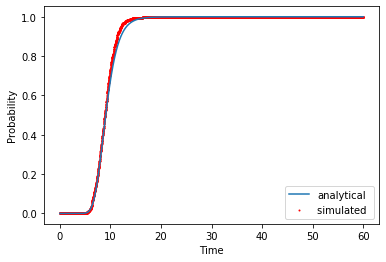

In [31]:
plt.plot(np.arange(0,X,0.01), prob,label="analytical")
plt.scatter(np.arange(0,X,0.01), new_p, color='r', s = 1, label="simulated ")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Time')